# A study on Retail Price Optimization of Garden Tool Products

# Introduction:
    

# Problem Statement:-

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv("garden.csv")

In [3]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,garden5,garden_tools,01-03-2017,6,419.4,32.680000,69.900000,9000,4.1,21,...,69.900000,4.1,32.680000,69.900000,4.1,32.680000,69.900000,4.1,32.680000,69.850000
1,garden5,garden_tools,01-04-2017,3,247.9,34.216667,82.633333,9000,4.1,17,...,82.633333,4.1,34.216667,82.633333,4.1,34.216667,82.633333,4.1,34.216667,69.900000
2,garden5,garden_tools,01-05-2017,20,1956.0,39.897500,97.588235,9000,4.1,34,...,59.900000,4.1,19.732500,59.900000,4.2,26.246667,97.588235,4.1,39.897500,82.633333
3,garden5,garden_tools,01-06-2017,8,712.0,40.801250,89.000000,9000,4.1,26,...,59.900000,4.1,17.670000,59.900000,4.2,16.260000,89.000000,4.1,40.801250,97.588235
4,garden5,garden_tools,01-07-2017,10,890.0,39.156000,89.000000,9000,4.1,74,...,59.900000,4.1,16.626429,59.900000,4.2,16.111579,59.900000,4.1,15.392308,89.000000


In [4]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [5]:
#checking missing values
df.isnull().sum()

product_id               0
product_category_name    0
month_year               0
qty                      0
total_price              0
freight_price            0
unit_price               0
product_weight_g         0
product_score            0
customers                0
weekday                  0
weekend                  0
holiday                  0
month                    0
year                     0
s                        0
comp_1                   0
ps1                      0
fp1                      0
comp_2                   0
ps2                      0
fp2                      0
comp_3                   0
ps3                      0
fp3                      0
lag_price                0
dtype: int64

In [6]:
# check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             160 non-null    object 
 1   product_category_name  160 non-null    object 
 2   month_year             160 non-null    object 
 3   qty                    160 non-null    int64  
 4   total_price            160 non-null    float64
 5   freight_price          160 non-null    float64
 6   unit_price             160 non-null    float64
 7   product_weight_g       160 non-null    int64  
 8   product_score          160 non-null    float64
 9   customers              160 non-null    int64  
 10  weekday                160 non-null    int64  
 11  weekend                160 non-null    int64  
 12  holiday                160 non-null    int64  
 13  month                  160 non-null    int64  
 14  year                   160 non-null    int64  
 15  s     

In [7]:
# to check number of columns and rows in dataset
df.shape

(160, 26)

In [8]:
# To mathematical and statistical information
df.describe()

,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,weekday,weekend,holiday,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,14.987500,1022.390875,28.458310,80.094699,3817.187500,4.161875,110.11250,21.756250,8.675000,1.487500,...,58.058546,4.105000,18.364039,58.194053,4.197500,21.009242,59.884549,4.110625,20.181511,80.501241
std,16.322222,926.335904,13.171023,37.034717,2737.906782,0.094418,76.57684,1.007811,0.731587,0.924764,...,16.475487,0.031323,5.792097,16.433640,0.027357,6.653253,18.924373,0.047047,6.149544,37.259496
min,1.000000,49.900000,5.281739,49.900000,1500.000000,4.000000,3.00000,20.000000,8.000000,0.000000,...,49.900000,4.000000,5.281739,49.900000,4.000000,13.510345,49.900000,4.000000,12.980000,49.900000
25%,4.750000,299.460000,17.678333,53.694213,1650.000000,4.100000,54.00000,21.000000,8.000000,1.000000,...,50.545161,4.100000,16.626429,50.900000,4.200000,16.260000,50.357143,4.100000,16.505128,53.900000
50%,9.000000,723.500000,23.186833,59.900000,1850.000000,4.200000,111.00000,22.000000,9.000000,1.000000,...,53.900000,4.100000,18.065897,53.900000,4.200000,17.681111,53.900000,4.100000,18.275507,59.900000
75%,19.250000,1487.285000,37.081364,99.990000,6050.000000,4.200000,139.25000,23.000000,9.000000,2.000000,...,59.900000,4.100000,19.890833,59.900000,4.200000,23.251667,59.900000,4.100000,20.990000,99.990000
max,91.000000,4769.700000,79.760000,187.854286,9000.000000,4.300000,339.00000,23.000000,10.000000,4.000000,...,179.990000,4.300000,36.643333,179.990000,4.300000,36.643333,179.990000,4.300000,40.801250,187.854286


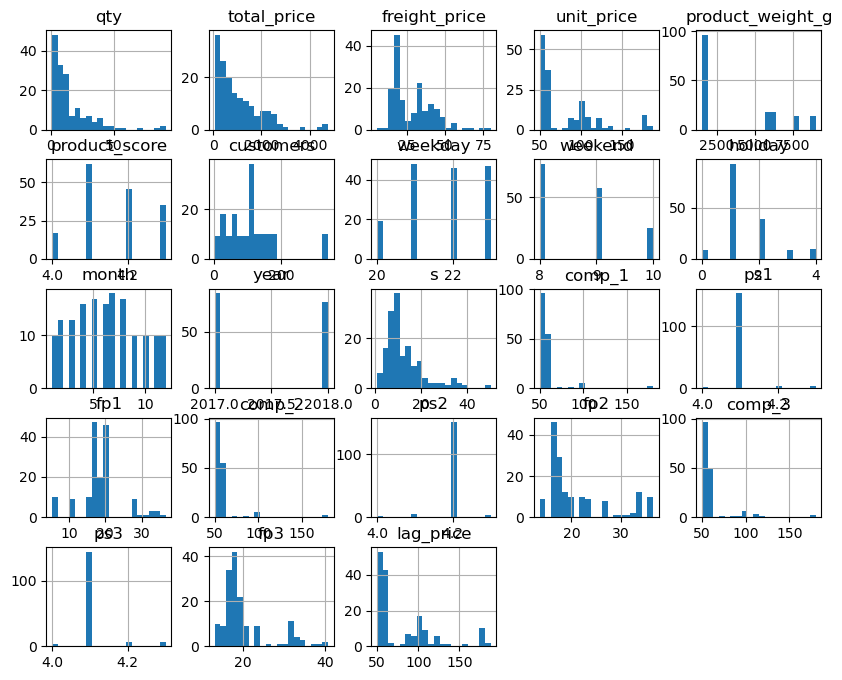

In [9]:
df.hist(bins=20, figsize=(10, 8))
plt.show()


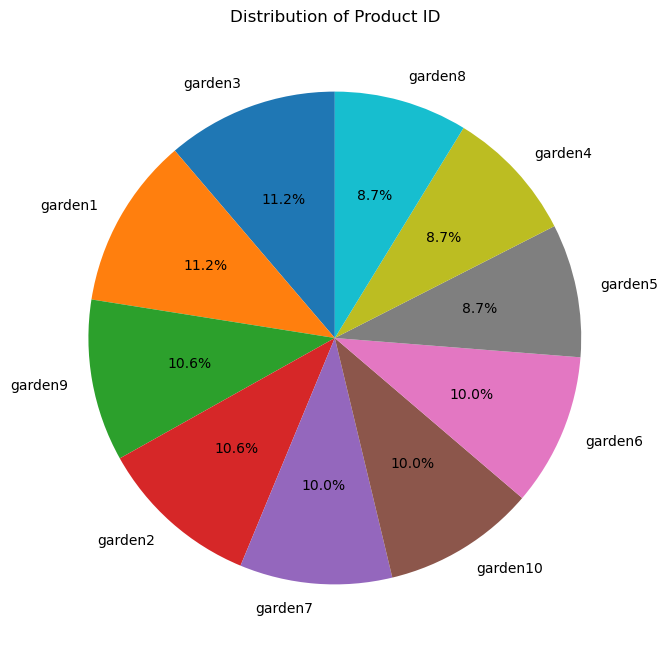

In [10]:
# Assuming 'df' is DataFrame and 'product_ID' is a categorical variable
category_counts = df['product_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product ID')
plt.show()


In [11]:

# Convert 'month_year' to datetime type
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Set 'month_year' as the index for time-based analysis
df.set_index('month_year', inplace=True)



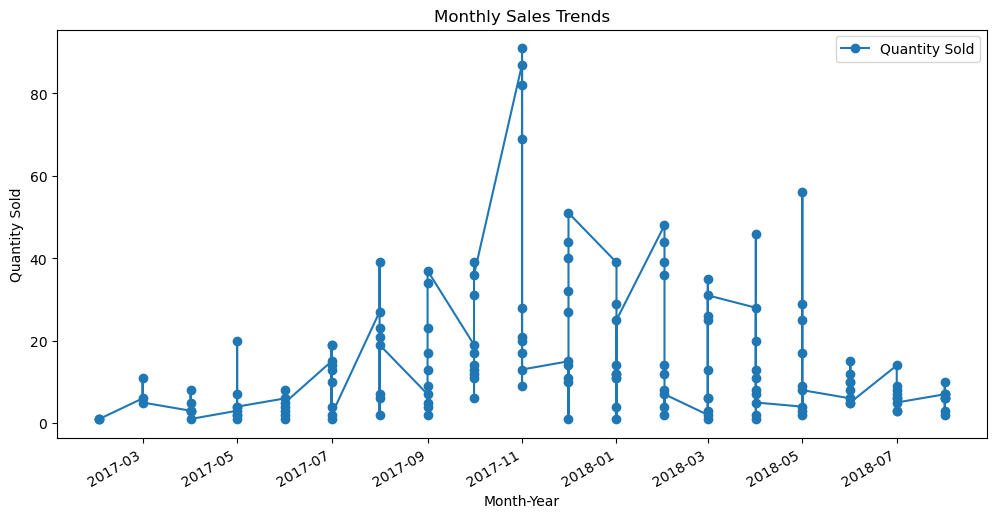

In [12]:
# Sales trends over time
plt.figure(figsize=(12, 6))
df['qty'].plot(label='Quantity Sold', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

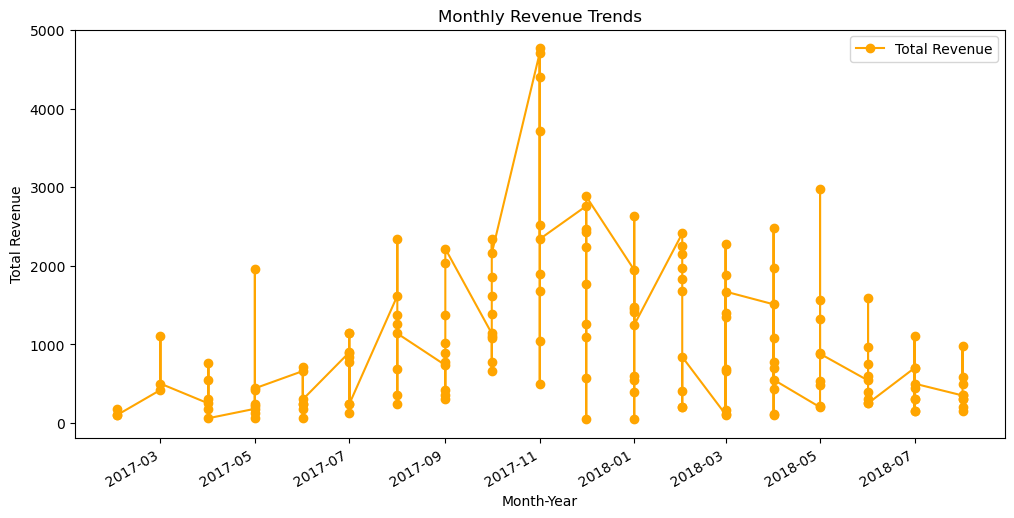

In [13]:
# Revenue trends over time
plt.figure(figsize=(12, 6))
df['total_price'].plot(label='Total Revenue', marker='o', color='orange')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

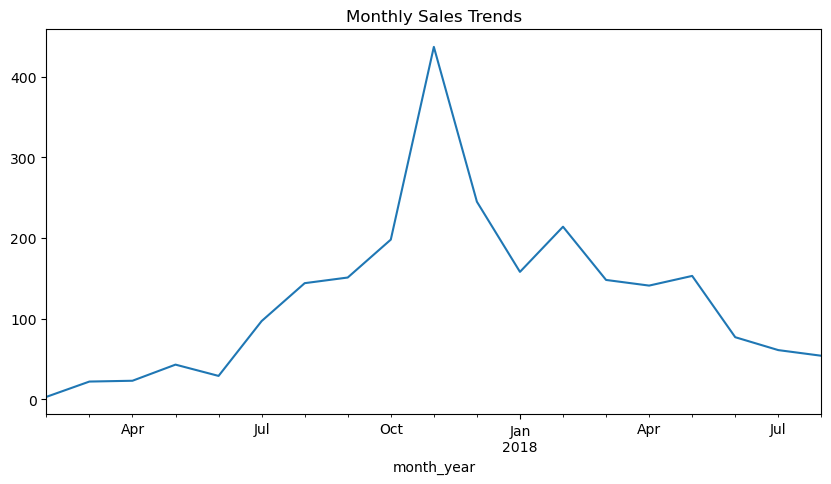

In [14]:
# Plot monthly sales trends
plt.figure(figsize=(10, 5))
df['qty'].resample('M').sum().plot(title='Monthly Sales Trends')
plt.show()

C:\Users\kumbh\AppData\Local\Temp\ipykernel_12596\2050228485.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


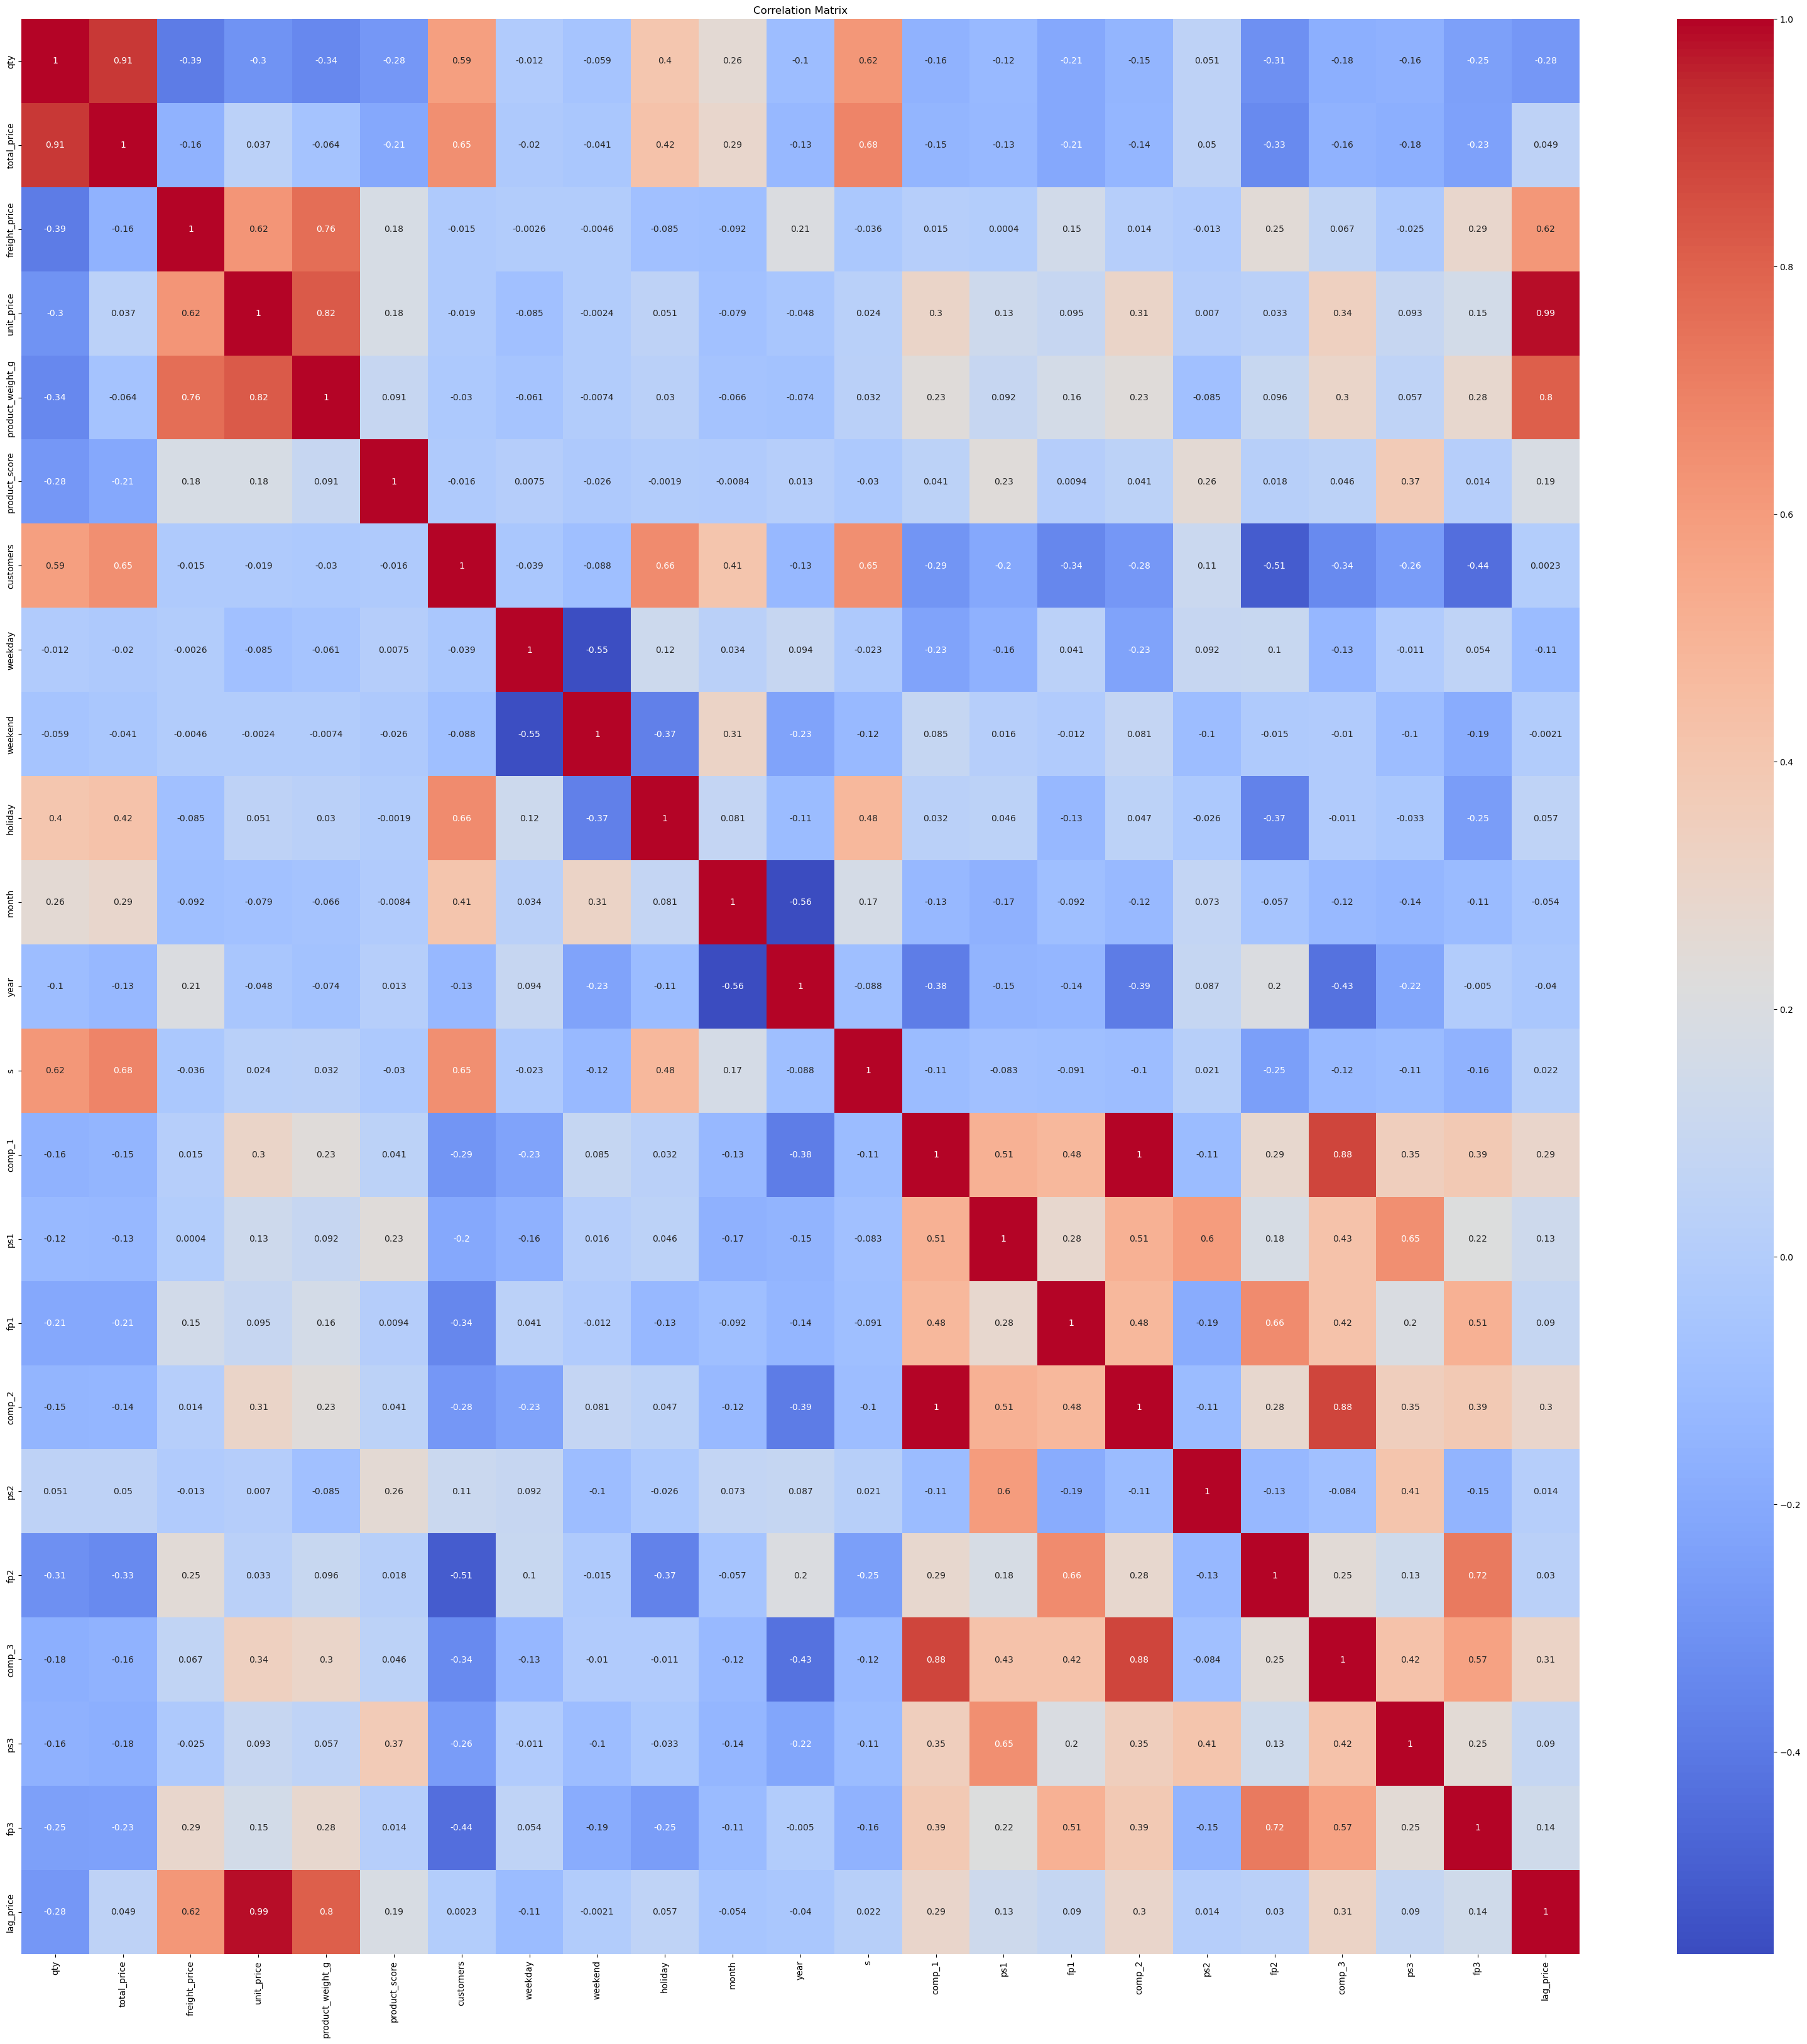

In [15]:
# Correlation Analysis
plt.figure(figsize=(40, 40))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
df.corr()

C:\Users\kumbh\AppData\Local\Temp\ipykernel_12596\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,weekday,weekend,holiday,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
qty,1.000000,0.911608,-0.391114,-0.297984,-0.341167,-0.278638,0.586356,-0.012421,-0.059332,0.402910,...,-0.155233,-0.117972,-0.207735,-0.145851,0.050635,-0.312824,-0.175973,-0.164447,-0.245245,-0.280226
total_price,0.911608,1.000000,-0.158342,0.036775,-0.064312,-0.209191,0.646885,-0.020370,-0.040985,0.423624,...,-0.146982,-0.125287,-0.207348,-0.136914,0.049697,-0.333589,-0.156766,-0.175812,-0.234597,0.048520
freight_price,-0.391114,-0.158342,1.000000,0.621518,0.758812,0.180117,-0.015458,-0.002560,-0.004562,-0.084607,...,0.014807,0.000396,0.150404,0.014418,-0.013285,0.245685,0.066539,-0.024502,0.287190,0.621136
unit_price,-0.297984,0.036775,0.621518,1.000000,0.818337,0.176967,-0.018833,-0.085304,-0.002447,0.051244,...,0.304715,0.129567,0.095111,0.305254,0.007008,0.033430,0.335008,0.092980,0.154266,0.985249
product_weight_g,-0.341167,-0.064312,0.758812,0.818337,1.000000,0.091475,-0.030164,-0.061495,-0.007398,0.029831,...,0.232145,0.092129,0.158464,0.232715,-0.085069,0.096296,0.300260,0.057164,0.280439,0.804590
product_score,-0.278638,-0.209191,0.180117,0.176967,0.091475,1.000000,-0.015844,0.007477,-0.025722,-0.001891,...,0.041307,0.234989,0.009446,0.041314,0.255052,0.018278,0.045946,0.374933,0.014202,0.185469
customers,0.586356,0.646885,-0.015458,-0.018833,-0.030164,-0.015844,1.000000,-0.038678,-0.088481,0.660430,...,-0.292596,-0.204232,-0.343926,-0.277110,0.110614,-0.506502,-0.335584,-0.261142,-0.440849,0.002336
weekday,-0.012421,-0.020370,-0.002560,-0.085304,-0.061495,0.007477,-0.038678,1.000000,-0.551688,0.121553,...,-0.228977,-0.160382,0.040536,-0.230510,0.091815,0.099626,-0.132392,-0.011358,0.054375,-0.105432
weekend,-0.059332,-0.040985,-0.004562,-0.002447,-0.007398,-0.025722,-0.088481,-0.551688,1.000000,-0.368595,...,0.084597,0.016467,-0.011839,0.080510,-0.103699,-0.015076,-0.010072,-0.100043,-0.185625,-0.002061
holiday,0.402910,0.423624,-0.084607,0.051244,0.029831,-0.001891,0.660430,0.121553,-0.368595,1.000000,...,0.032370,0.045596,-0.129047,0.047151,-0.026103,-0.366725,-0.011126,-0.033067,-0.252090,0.057319


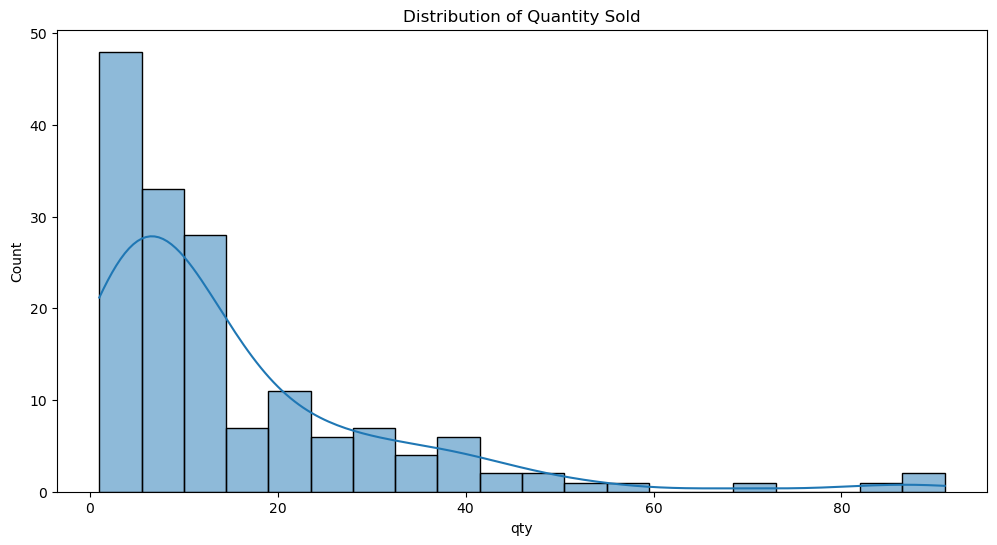

In [17]:
# Sales and Revenue Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['qty'], bins=20, kde=True)
plt.title('Distribution of Quantity Sold')
plt.show()

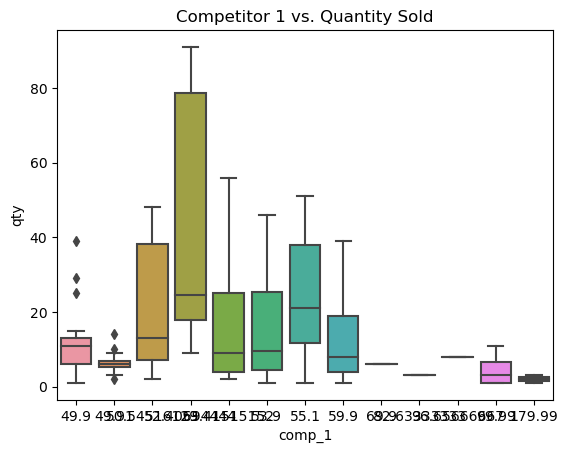

In [18]:
# Competitor Analysis
sns.boxplot(x='comp_1', y='qty', data=df)
plt.title('Competitor 1 vs. Quantity Sold')
plt.show()

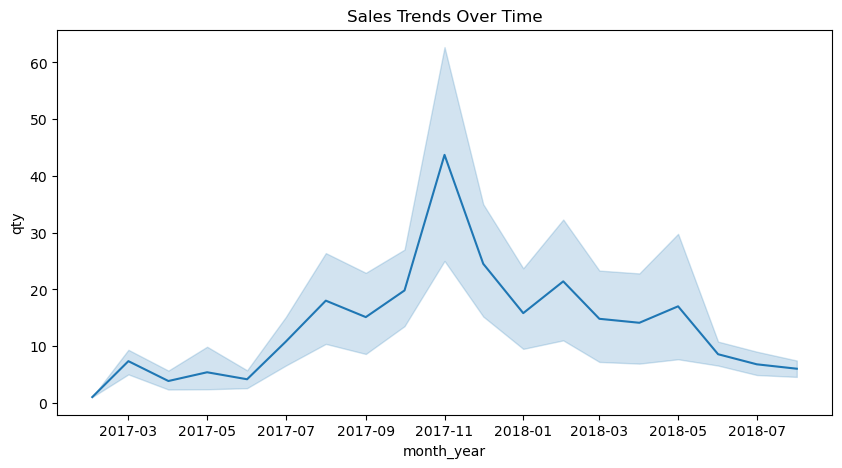

In [19]:
# Seasonal Trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y='qty', data=df)
plt.title('Sales Trends Over Time')
plt.show()


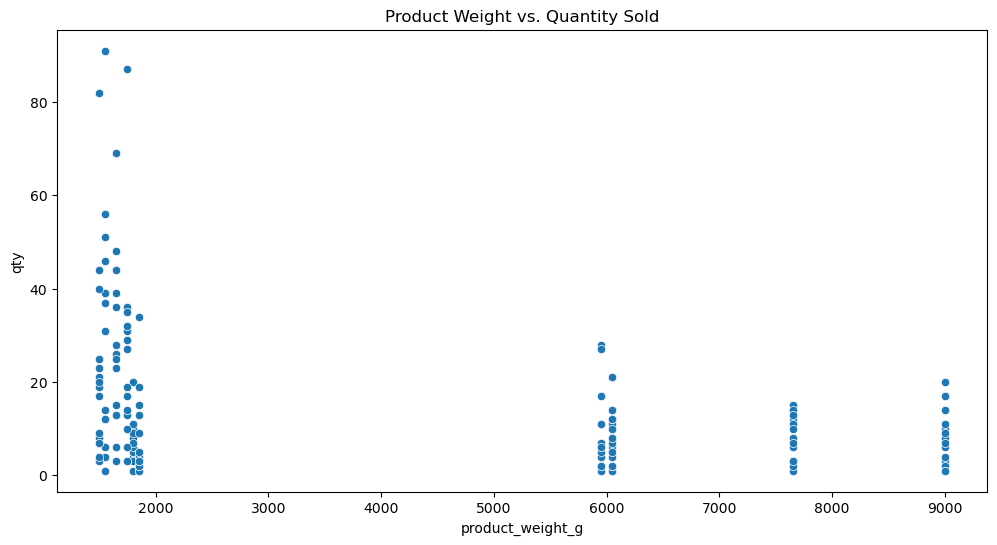

In [20]:
# Product Characteristics
plt.figure(figsize=(12, 6))
sns.scatterplot(x='product_weight_g', y='qty', data=df)
plt.title('Product Weight vs. Quantity Sold')
plt.show()

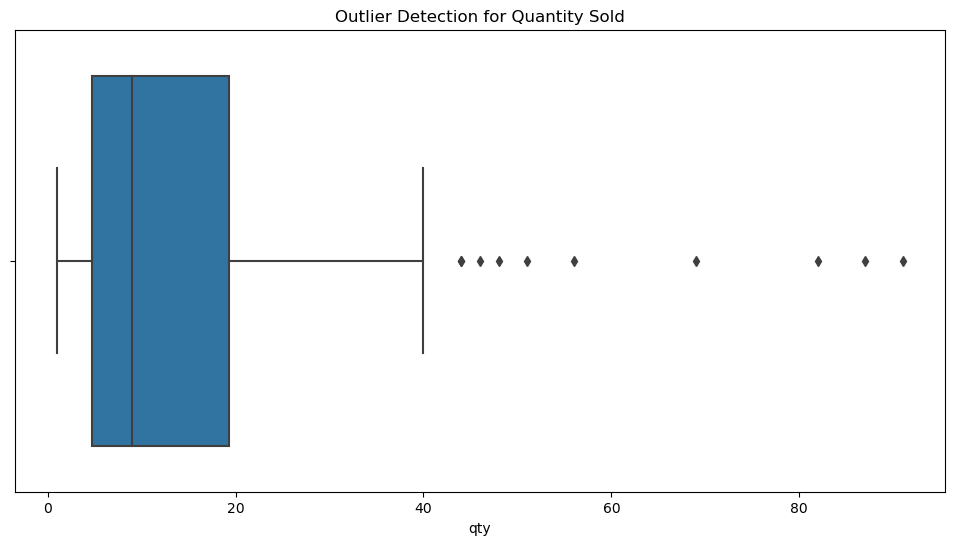

In [21]:
# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(x='qty', data=df)
plt.title('Outlier Detection for Quantity Sold')
plt.show()

In [22]:
# Group by product_id and calculate the total quantity sold and average product score
product_popularity = df.groupby('product_id').agg({'qty': 'sum', 'product_score': 'mean'}).reset_index()


In [23]:
# Sort products by total quantity sold or average product score based on your criteria
sorted_by_quantity = product_popularity.sort_values(by='qty', ascending=False)
sorted_by_score = product_popularity.sort_values(by='product_score', ascending=False)


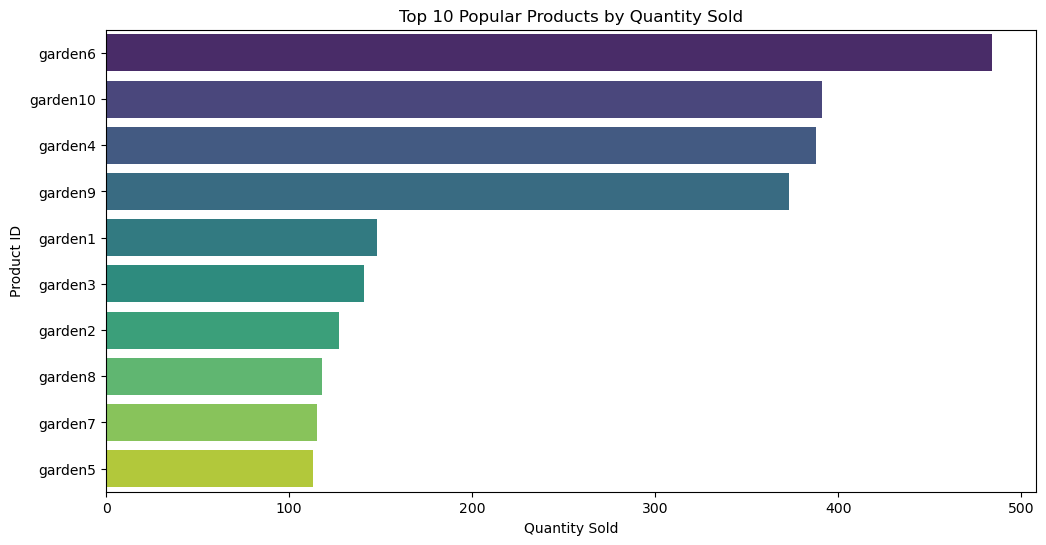

In [24]:
# Visualization of popular products based on quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x='qty', y='product_id', data=sorted_by_quantity.head(10), palette='viridis')
plt.title('Top 10 Popular Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.show()


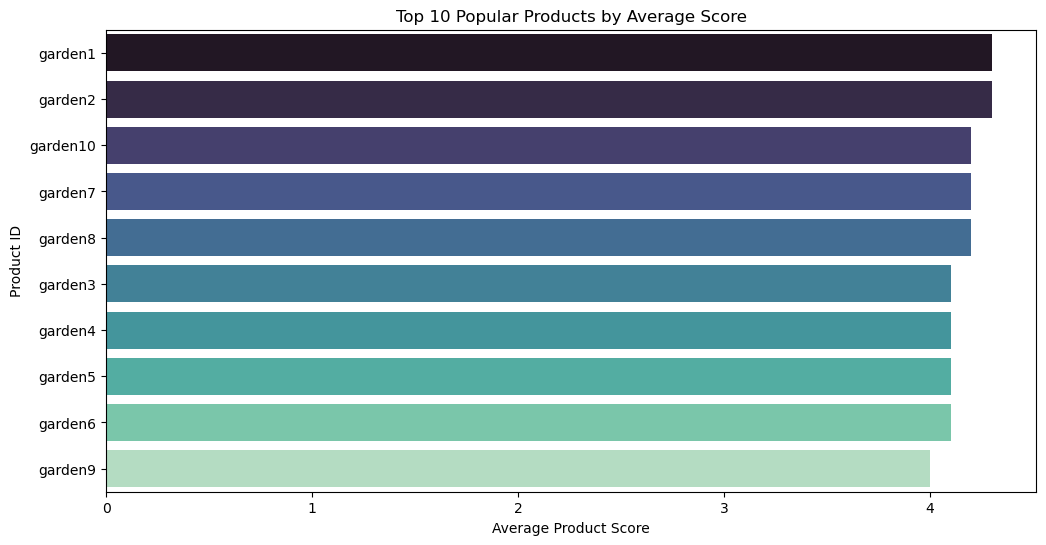

In [25]:
# Visualization of popular products based on average product score
plt.figure(figsize=(12, 6))
sns.barplot(x='product_score', y='product_id', data=sorted_by_score.head(10), palette='mako')
plt.title('Top 10 Popular Products by Average Score')
plt.xlabel('Average Product Score')
plt.ylabel('Product ID')
plt.show()


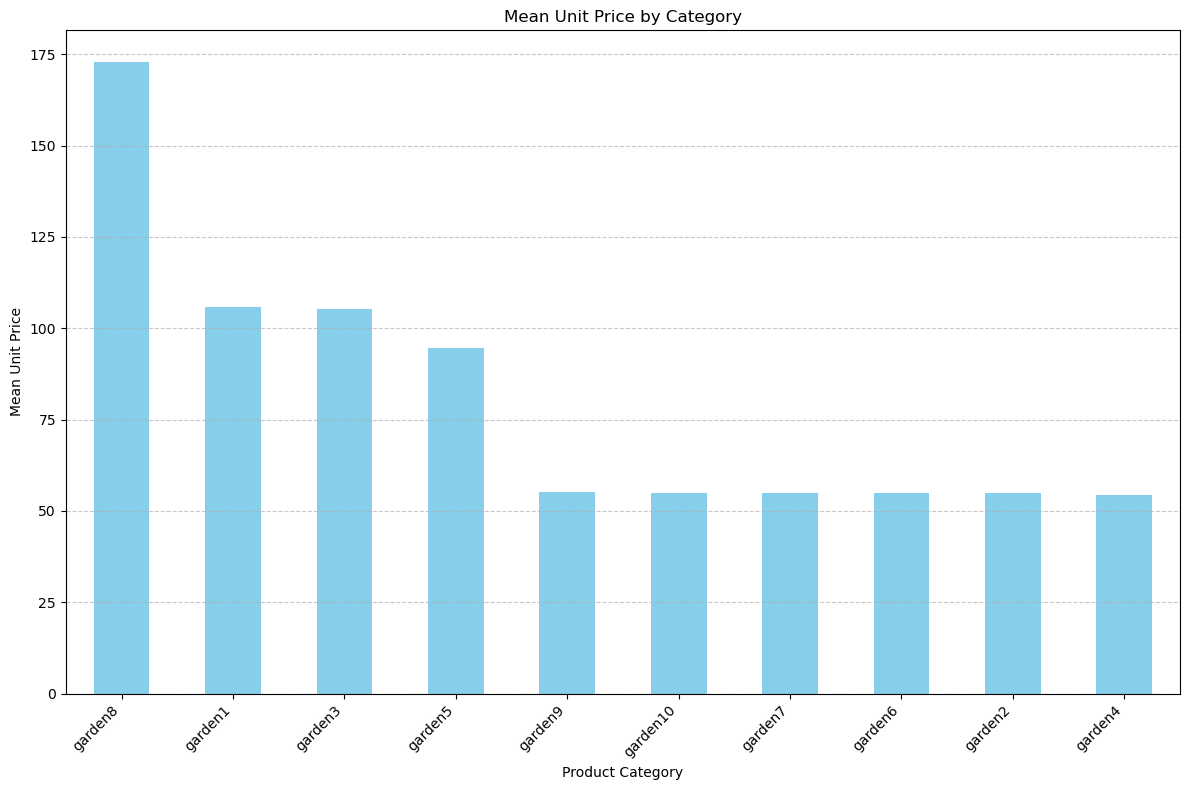

In [26]:

# Update the column names in the analysis function
def category_wise_analysis(df):
    # Ensure 'product_id' is in the columns
    if 'product_id' in df.columns:
        # Group by product_id and calculate mean unit price
        category_mean_prices = df.groupby('product_id')['unit_price'].mean().sort_values(ascending=False)

        # Plotting
        plt.figure(figsize=(12, 8))
        category_mean_prices.plot(kind='bar', color='skyblue')
        plt.title('Mean Unit Price by Category')
        plt.xlabel('Product Category')
        plt.ylabel('Mean Unit Price')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()
    else:
        print("Error: 'product_id' not found in DataFrame columns.")


category_wise_analysis(df)



In [27]:



# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical columns using Min-Max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [28]:
# Display the normalized DataFrame
print(df.head())


           product_id product_category_name       qty  total_price  \
month_year                                                           
2017-03-01    garden5          garden_tools  0.055556     0.078287   
2017-04-01    garden5          garden_tools  0.022222     0.041951   
2017-05-01    garden5          garden_tools  0.211111     0.403852   
2017-06-01    garden5          garden_tools  0.077778     0.140281   
2017-07-01    garden5          garden_tools  0.100000     0.177995   

            freight_price  unit_price  product_weight_g  product_score  \
month_year                                                               
2017-03-01       0.367869    0.144976               1.0       0.333333   
2017-04-01       0.388502    0.237277               1.0       0.333333   
2017-05-01       0.464777    0.345681               1.0       0.333333   
2017-06-01       0.476911    0.283427               1.0       0.333333   
2017-07-01       0.454821    0.283427               1.0       0.3

In [29]:
df.shape

(160, 25)

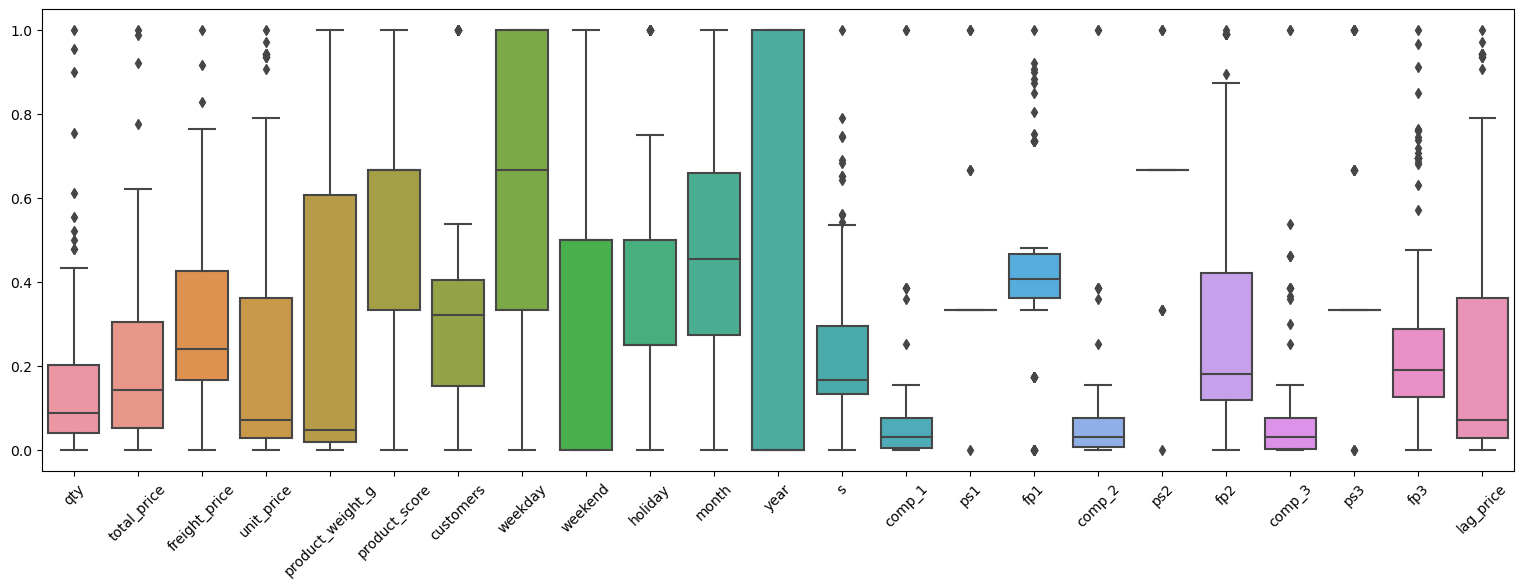

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(19,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


# Variable Selection

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


# Assuming 'total_price' is your target variable and 'df' is your dataframe
# Select features and target variable
features = [ 'qty', 'freight_price', 'unit_price', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price']
target = 'total_price'

# Create X (features) and y (target)
X = df[features]
y = df[target]




# Stepwise Variable Selection Method

In [32]:
def stepwise_selection(X, y, significance_level=0.05):
    cols = X.columns
    selected_cols = []
    while len(cols) > 0:
        remaining_cols = list(set(cols) - set(selected_cols))
        p_values = []
        for col in remaining_cols:
            X_ = X[selected_cols + [col]]
            model = sm.OLS(y, X_).fit()
            p_values.append((col, model.pvalues[col]))
        best_feature, min_p = sorted(p_values, key=lambda x: x[1])[0]
        if min_p < significance_level:
            selected_cols.append(best_feature)
        else:
            break
    return selected_cols


In [33]:
# Use the functions
selected_features_stepwise = stepwise_selection(X, y)

# Display the selected features
print("Stepwise Selection Selected Features:", selected_features_stepwise)


Stepwise Selection Selected Features: ['qty', 'unit_price', 'comp_3', 'year', 's']


# Outliers Handling

In [34]:
# Calculate the first and third quartiles
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the defined bounds
df['total_price_adjusted'] = np.where(df['total_price'] < lower_bound, lower_bound,
                                      np.where(df['total_price'] > upper_bound, upper_bound, df['total_price']))


In [35]:
# Calculate the first and third quartiles
Q1 = df['qty'].quantile(0.25)
Q3 = df['qty'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the defined bounds
df['qty_adjusted'] = np.where(df['qty'] < lower_bound, lower_bound,
                                      np.where(df['qty'] > upper_bound, upper_bound, df['qty']))


In [36]:
# Calculate the first and third quartiles
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the defined bounds
df['unit_price_adjusted'] = np.where(df['unit_price'] < lower_bound, lower_bound,
                                      np.where(df['unit_price'] > upper_bound, upper_bound, df['unit_price']))


In [37]:
# Calculate the first and third quartiles
Q1 = df['comp_3'].quantile(0.25)
Q3 = df['comp_3'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the defined bounds
df['comp_3_adjusted'] = np.where(df['comp_3'] < lower_bound, lower_bound,
                                      np.where(df['comp_3'] > upper_bound, upper_bound, df['comp_3']))


In [38]:
# Calculate the first and third quartiles
Q1 = df['s'].quantile(0.25)
Q3 = df['s'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the defined bounds
df['s_adjusted'] = np.where(df['s'] < lower_bound, lower_bound,
                                      np.where(df['s'] > upper_bound, upper_bound, df['s']))


In [39]:
df

,product_id,product_category_name,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,weekday,...,fp2,comp_3,ps3,fp3,lag_price,total_price_adjusted,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted
month_year,,,,,,,,,,,,,,,,,,,,,
2017-03-01,garden5,garden_tools,0.055556,0.078287,0.367869,0.144976,1.000000,0.333333,0.053571,1.000000,...,0.828672,0.153740,0.333333,0.708092,0.144613,0.078287,0.055556,0.144976,0.153740,0.165948
2017-04-01,garden5,garden_tools,0.022222,0.041951,0.388502,0.237277,1.000000,0.333333,0.041667,0.000000,...,0.895099,0.251621,0.333333,0.763325,0.144976,0.041951,0.022222,0.237277,0.186904,0.136810
2017-05-01,garden5,garden_tools,0.211111,0.403852,0.464777,0.345681,1.000000,0.333333,0.092262,1.000000,...,0.550570,0.366579,0.333333,0.967516,0.237277,0.403852,0.211111,0.345681,0.186904,0.368694
2017-06-01,garden5,garden_tools,0.077778,0.140281,0.476911,0.283427,1.000000,0.333333,0.068452,0.666667,...,0.118863,0.300561,0.333333,1.000000,0.345681,0.140281,0.077778,0.283427,0.186904,0.135596
2017-07-01,garden5,garden_tools,0.100000,0.177995,0.454821,0.283427,1.000000,0.333333,0.211310,0.333333,...,0.112447,0.076870,0.333333,0.086707,0.283427,0.177995,0.100000,0.283427,0.076870,0.174446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,garden1,garden_tools,0.044444,0.105958,0.502754,0.435652,0.593333,1.000000,0.321429,0.333333,...,0.257559,0.030748,0.333333,0.218949,0.435652,0.105958,0.044444,0.435652,0.030748,0.184158
2018-05-01,garden1,garden_tools,0.011111,0.036040,0.361827,0.435652,0.593333,1.000000,0.294643,1.000000,...,0.000000,0.024275,0.333333,0.000000,0.435652,0.036040,0.011111,0.435652,0.024275,0.062615
2018-06-01,garden1,garden_tools,0.055556,0.103826,0.575961,0.290604,0.593333,1.000000,0.163690,0.333333,...,0.421101,0.000000,0.333333,0.355795,0.435652,0.103826,0.055556,0.290604,0.000000,0.165011


Text(0, 0.5, 'Frequency')

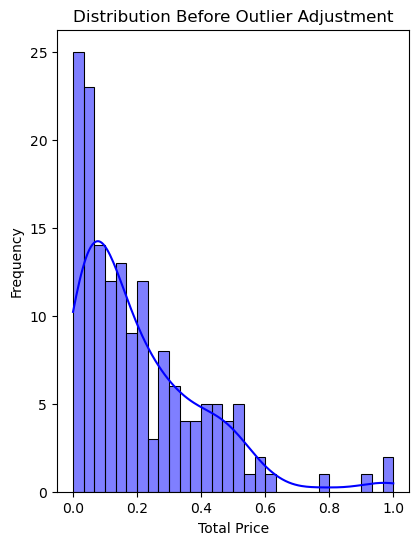

In [40]:
# Plot the distribution graph before and after adjusting outliers
plt.figure(figsize=(10, 6))

# Plot the distribution before adjusting outliers
plt.subplot(1, 2, 1)
sns.histplot(df['total_price'], kde=True, color='blue', bins=30)
plt.title('Distribution Before Outlier Adjustment')
plt.xlabel('Total Price')
plt.ylabel('Frequency')



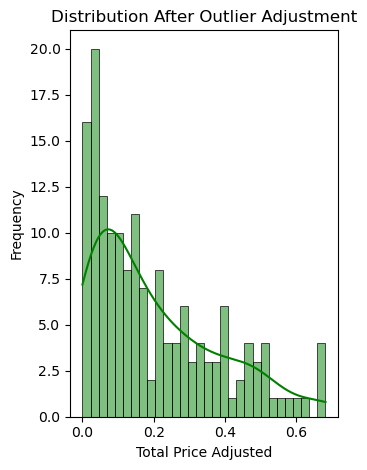

In [41]:
# Plot the distribution after adjusting outliers
plt.subplot(1, 2, 2)
sns.histplot(df['total_price_adjusted'], kde=True, color='green', bins=30)
plt.title('Distribution After Outlier Adjustment')
plt.xlabel('Total Price Adjusted')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
df.drop(['qty', 'unit_price', 'comp_3', 's','total_price'],axis=1)


,product_id,product_category_name,freight_price,product_weight_g,product_score,customers,weekday,weekend,holiday,month,...,ps2,fp2,ps3,fp3,lag_price,total_price_adjusted,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted
month_year,,,,,,,,,,,,,,,,,,,,,
2017-03-01,garden5,garden_tools,0.367869,1.000000,0.333333,0.053571,1.000000,0.0,0.25,0.181818,...,0.333333,0.828672,0.333333,0.708092,0.144613,0.078287,0.055556,0.144976,0.153740,0.165948
2017-04-01,garden5,garden_tools,0.388502,1.000000,0.333333,0.041667,0.000000,1.0,0.50,0.272727,...,0.333333,0.895099,0.333333,0.763325,0.144976,0.041951,0.022222,0.237277,0.186904,0.136810
2017-05-01,garden5,garden_tools,0.464777,1.000000,0.333333,0.092262,1.000000,0.0,0.25,0.363636,...,0.666667,0.550570,0.333333,0.967516,0.237277,0.403852,0.211111,0.345681,0.186904,0.368694
2017-06-01,garden5,garden_tools,0.476911,1.000000,0.333333,0.068452,0.666667,0.0,0.25,0.454545,...,0.666667,0.118863,0.333333,1.000000,0.345681,0.140281,0.077778,0.283427,0.186904,0.135596
2017-07-01,garden5,garden_tools,0.454821,1.000000,0.333333,0.211310,0.333333,1.0,0.25,0.545455,...,0.666667,0.112447,0.333333,0.086707,0.283427,0.177995,0.100000,0.283427,0.076870,0.174446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,garden1,garden_tools,0.502754,0.593333,1.000000,0.321429,0.333333,0.5,0.25,0.272727,...,0.666667,0.257559,0.333333,0.218949,0.435652,0.105958,0.044444,0.435652,0.030748,0.184158
2018-05-01,garden1,garden_tools,0.361827,0.593333,1.000000,0.294643,1.000000,0.0,0.75,0.363636,...,0.666667,0.000000,0.333333,0.000000,0.435652,0.036040,0.011111,0.435652,0.024275,0.062615
2018-06-01,garden1,garden_tools,0.575961,0.593333,1.000000,0.163690,0.333333,0.5,0.00,0.454545,...,0.666667,0.421101,0.333333,0.355795,0.435652,0.103826,0.055556,0.290604,0.000000,0.165011


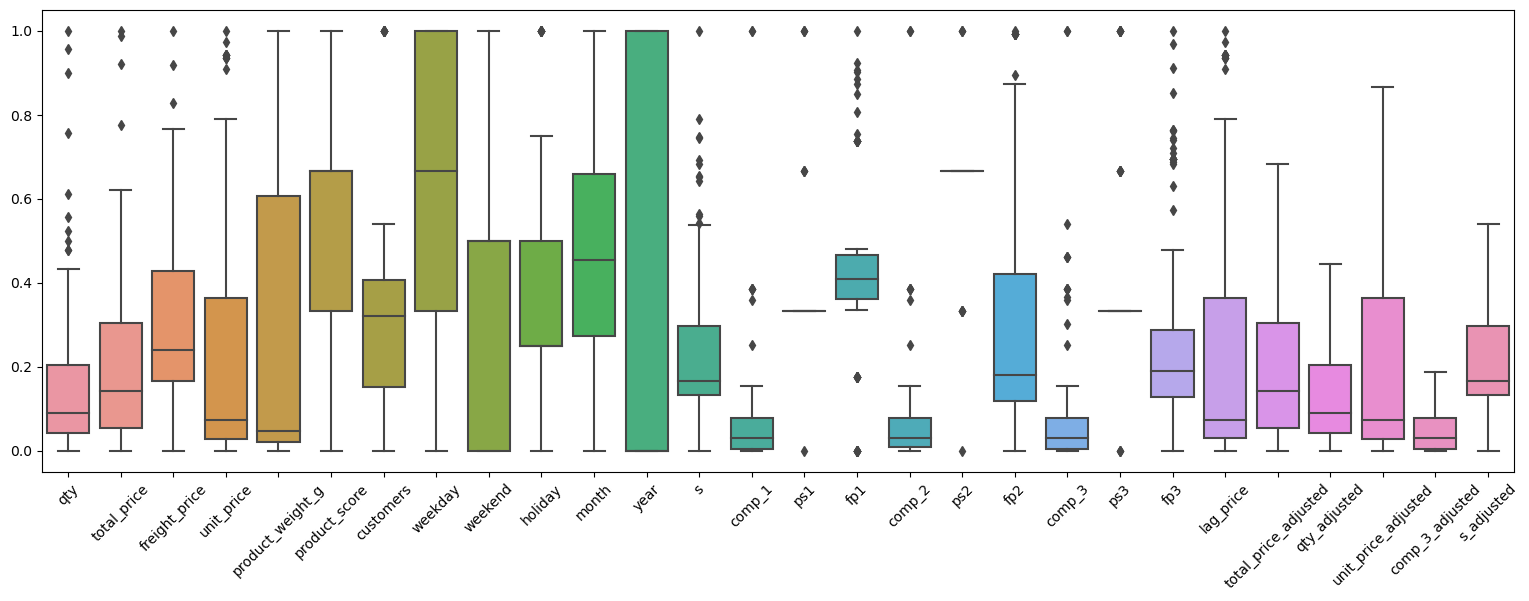

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(19,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


# multiple linear regression

In [44]:
# Select features and target variable
features = ['qty_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
target = 'total_price_adjusted'

# Create X (features) and y (target)
X =df[features]
y =df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.033333,0.072488,0.076870,0.269540,0.0
2017-11-01,0.222222,0.290604,0.029869,0.536454,0.0
2017-05-01,0.211111,0.345681,0.186904,0.368694,0.0
2018-07-01,0.044444,0.363091,0.000000,0.086358,1.0
2017-06-01,0.022222,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.444444,0.028995,0.030748,0.431264,1.0
2018-08-01,0.066667,0.000000,0.000000,0.124491,1.0
2017-04-01,0.000000,0.072488,0.076870,0.140911,0.0


In [46]:
X_test

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.088889,0.000000,0.000000,0.128294,1.0
2017-03-01,0.111111,0.363091,0.186904,0.221490,0.0
2018-08-01,0.022222,0.000000,0.000000,0.295792,1.0
2018-04-01,0.133333,0.028995,0.030748,0.134354,1.0
2017-08-01,0.222222,0.072488,0.076870,0.124491,0.0
2018-08-01,0.066667,0.000000,0.000000,0.210934,1.0
2018-03-01,0.266667,0.028995,0.030748,0.309166,1.0
2017-12-01,0.344444,0.040049,0.044969,0.278222,0.0
2018-02-01,0.444444,0.008155,0.003514,0.540832,1.0


In [47]:
# Initialize and train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)
intercept = model.intercept_


In [49]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [50]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print coefficients
print('Coefficients:', model.coef_)
print('\nIntercept:', intercept)

Mean Squared Error: 0.0030310513014236095
R-squared: 0.919883332592171
Coefficients: [ 1.19420605  0.2750773  -0.56742079  0.0971789  -0.05355217]

Intercept: 0.005204541329583534


In [51]:

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Dependent variable: 'total_price_adjusted'

model_formula = 'total_price_adjusted ~ qty_adjusted+unit_price_adjusted+year+s_adjusted+comp_3_adjusted'
model = ols(model_formula, data=df).fit()

print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     total_price_adjusted   R-squared:                       0.927
Model:                              OLS   Adj. R-squared:                  0.925
Method:                   Least Squares   F-statistic:                     391.7
Date:                  Mon, 19 Feb 2024   Prob (F-statistic):           1.24e-85
Time:                          19:15:57   Log-Likelihood:                 260.57
No. Observations:                   160   AIC:                            -509.1
Df Residuals:                       154   BIC:                            -490.7
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

# Sale Prediction

In [52]:
# Assume 'qty' is the target variable, and select relevant features
features = [ 'total_price_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
# Create a new DataFrame with selected features
selected_df = df[['qty_adjusted'] + features]


In [53]:
# Split the data into features (X) and target variable (y)
X = selected_df[features]
y = selected_df['qty_adjusted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
X_train

,total_price_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.040192,0.072488,0.076870,0.269540,0.0
2017-11-01,0.389824,0.290604,0.029869,0.536454,0.0
2017-05-01,0.403852,0.345681,0.186904,0.368694,0.0
2018-07-01,0.095354,0.363091,0.000000,0.086358,1.0
2017-06-01,0.027501,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.514746,0.028995,0.030748,0.431264,1.0
2018-08-01,0.063435,0.000000,0.000000,0.124491,1.0
2017-04-01,0.002119,0.072488,0.076870,0.140911,0.0


In [55]:
 X_test

,total_price_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.084580,0.000000,0.000000,0.128294,1.0
2017-03-01,0.222465,0.363091,0.186904,0.221490,0.0
2018-08-01,0.021145,0.000000,0.000000,0.295792,1.0
2018-04-01,0.137887,0.028995,0.030748,0.134354,1.0
2017-08-01,0.255943,0.072488,0.076870,0.124491,0.0
2018-08-01,0.063435,0.000000,0.000000,0.210934,1.0
2018-03-01,0.274927,0.028995,0.030748,0.309166,1.0
2017-12-01,0.364380,0.040049,0.044969,0.278222,0.0
2018-02-01,0.465634,0.008155,0.003514,0.540832,1.0


In [56]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 0.10391316,  0.16139344,  0.0594373 ,  0.14860928,  0.20502517,
        0.08932029,  0.24934427,  0.2791215 ,  0.38298659,  0.00724446,
        0.11524106,  0.20431972,  0.02154899,  0.51013697,  0.06552065,
        0.13098481,  0.15103489, -0.04877392,  0.35022923,  0.04910702,
        0.0811625 ,  0.05827965, -0.01963344,  0.1031751 ,  0.22345779,
        0.32649011,  0.50855752,  0.27823154,  0.13249657,  0.09559307,
        0.05779528, -0.11104014])

In [58]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 0.0019317453766162563
R-squared: 0.9069120584473642


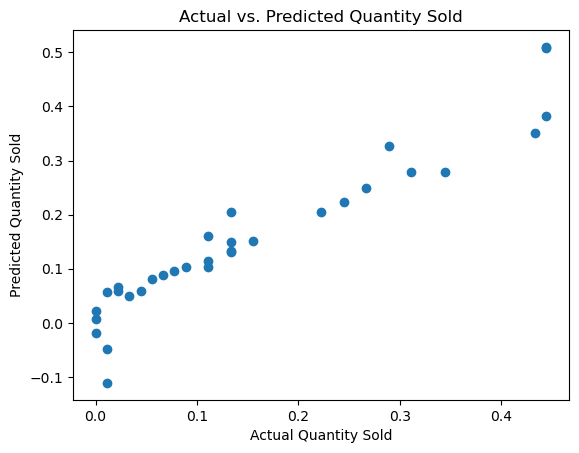

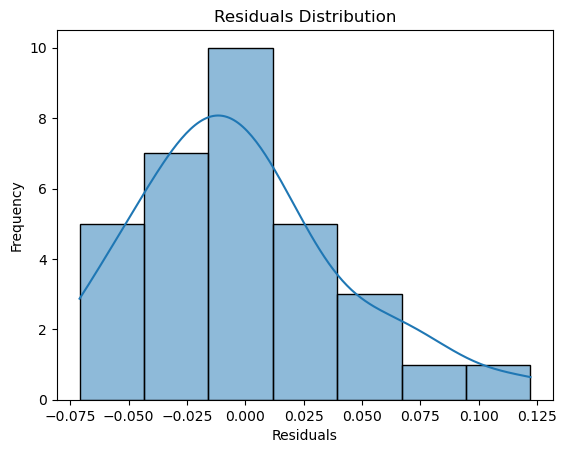

In [59]:
# Visualize actual vs. predicted quantities
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

# Visualize residuals (optional)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


# Optimizing Retail Price to Maximize Revenue and Customer Satisfaction 


In [60]:
# Select relevant features for analysis
selected_features = ['total_price_adjusted','qty_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
# Create a new DataFrame with selected features
selected_df =df[selected_features]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = selected_df.drop('total_price_adjusted', axis=1)
y = selected_df['total_price_adjusted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [62]:
X_train

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.033333,0.072488,0.076870,0.269540,0.0
2017-11-01,0.222222,0.290604,0.029869,0.536454,0.0
2017-05-01,0.211111,0.345681,0.186904,0.368694,0.0
2018-07-01,0.044444,0.363091,0.000000,0.086358,1.0
2017-06-01,0.022222,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.444444,0.028995,0.030748,0.431264,1.0
2018-08-01,0.066667,0.000000,0.000000,0.124491,1.0
2017-04-01,0.000000,0.072488,0.076870,0.140911,0.0


In [63]:
X_test

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.088889,0.000000,0.000000,0.128294,1.0
2017-03-01,0.111111,0.363091,0.186904,0.221490,0.0
2018-08-01,0.022222,0.000000,0.000000,0.295792,1.0
2018-04-01,0.133333,0.028995,0.030748,0.134354,1.0
2017-08-01,0.222222,0.072488,0.076870,0.124491,0.0
2018-08-01,0.066667,0.000000,0.000000,0.210934,1.0
2018-03-01,0.266667,0.028995,0.030748,0.309166,1.0
2017-12-01,0.344444,0.040049,0.044969,0.278222,0.0
2018-02-01,0.444444,0.008155,0.003514,0.540832,1.0


In [64]:
X_test.shape

(32, 5)

In [65]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [66]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [67]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 0.0030310513014236095
R-squared: 0.919883332592171


In [68]:
# Assume you have a function to calculate optimal prices based on the model predictions and other factors
def calculate_optimal_prices(predictions, comp_prices, other_factors):
    # Your price optimization logic here
    optimized_prices = predictions * (1 + 0.1)  # Example: Increase prices by 10%
    return optimized_prices

# Make predictions on the entire dataset
all_predictions = model.predict(X)

# Assume 'comp_1', 'comp_2', and 'comp_3' are competitor prices
comp_prices = df[['comp_3_adjusted']]

# Assume 'log_transformed_s' is a factor influencing price
other_factors =df['s_adjusted']

# Calculate optimized prices
optimized_prices = calculate_optimal_prices(all_predictions, comp_prices,other_factors)

# Add the optimized prices to the DataFrame
df['optimized_price'] = optimized_prices


In [69]:
optimized_prices

array([ 0.04435234,  0.0046794 ,  0.31039814,  0.09149334,  0.1935169 ,
        0.1617781 ,  0.19877832,  0.28213982,  0.36149265,  0.25203434,
        0.15720961,  0.12369143,  0.05744646,  0.05433178, -0.00525767,
       -0.00334516,  0.04034348,  0.07520679,  0.05474148,  0.16487112,
        0.32533545,  0.16001807,  0.13273477,  0.07856882, -0.02505058,
        0.05363326,  0.07198862,  0.02220944,  0.03667339,  0.05694085,
        0.16159158,  0.31477709,  0.16702776,  0.52805874,  0.63725169,
        0.62065609,  0.54409614,  0.58242479,  0.32901419,  0.36050091,
        0.31546414,  0.16625544, -0.01722873,  0.03378583,  0.02662787,
        0.01205047,  0.25861896,  0.3768328 ,  0.22802074,  0.44630047,
        0.63695025,  0.47198795,  0.39014508,  0.50118927,  0.47490755,
        0.12591162,  0.36646256,  0.02297624,  0.15277791,  0.09584154,
        0.0522799 , -0.01575315,  0.175983  ,  0.55075371,  0.53224157,
        0.56301318,  0.63422754,  0.61106755,  0.1178337 ,  0.53

In [70]:
# Add the optimized prices to the DataFrame
df['optimized_price'] = optimized_prices


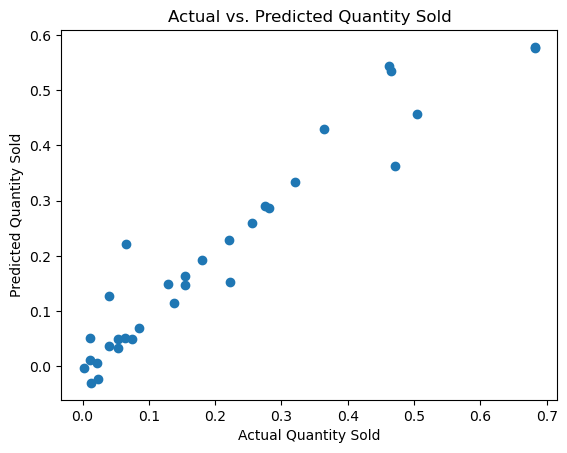

Original Revenue: Rs3.00
Optimized Revenue:Rs 8.62


In [71]:
# Visualize actual vs. predicted quantities
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

# Visualize the impact of optimized prices on revenue
revenue_original = (df['qty_adjusted'] * df['unit_price_adjusted']).sum()
revenue_optimized = (df['qty_adjusted'] * df['optimized_price']).sum()

print(f'Original Revenue: Rs{revenue_original:.2f}')
print(f'Optimized Revenue:Rs {revenue_optimized:.2f}')


# Decision Tree

# Prediction Task: Quantity Sold Prediction

In [72]:
#Target Variable (Dependent Variable): qty (Quantity Sold)
#Features (Independent Variables): 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_text

In [73]:
# Select features and target variable
features=[ 'total_price_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
target = 'qty_adjusted'
# Handle missing values 

df = df.dropna(subset=features + [target])

# Create X (features) and y (target)
X = df[features]
y = df[target]


In [74]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
X_train

,total_price_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.040192,0.072488,0.076870,0.269540,0.0
2017-11-01,0.389824,0.290604,0.029869,0.536454,0.0
2017-05-01,0.403852,0.345681,0.186904,0.368694,0.0
2018-07-01,0.095354,0.363091,0.000000,0.086358,1.0
2017-06-01,0.027501,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.514746,0.028995,0.030748,0.431264,1.0
2018-08-01,0.063435,0.000000,0.000000,0.124491,1.0
2017-04-01,0.002119,0.072488,0.076870,0.140911,0.0


In [76]:
X_test

,total_price_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.084580,0.000000,0.000000,0.128294,1.0
2017-03-01,0.222465,0.363091,0.186904,0.221490,0.0
2018-08-01,0.021145,0.000000,0.000000,0.295792,1.0
2018-04-01,0.137887,0.028995,0.030748,0.134354,1.0
2017-08-01,0.255943,0.072488,0.076870,0.124491,0.0
2018-08-01,0.063435,0.000000,0.000000,0.210934,1.0
2018-03-01,0.274927,0.028995,0.030748,0.309166,1.0
2017-12-01,0.364380,0.040049,0.044969,0.278222,0.0
2018-02-01,0.465634,0.008155,0.003514,0.540832,1.0


In [77]:
# Initialize and train the decision tree model

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0002970679012345679
R-squared: 0.9856847389091585


In [79]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print('\nFeature Importances:')
print(feature_importances)


Feature Importances:
                Feature  Importance
0  total_price_adjusted    0.785660
1   unit_price_adjusted    0.204360
2       comp_3_adjusted    0.001448
3            s_adjusted    0.007206
4                  year    0.001327


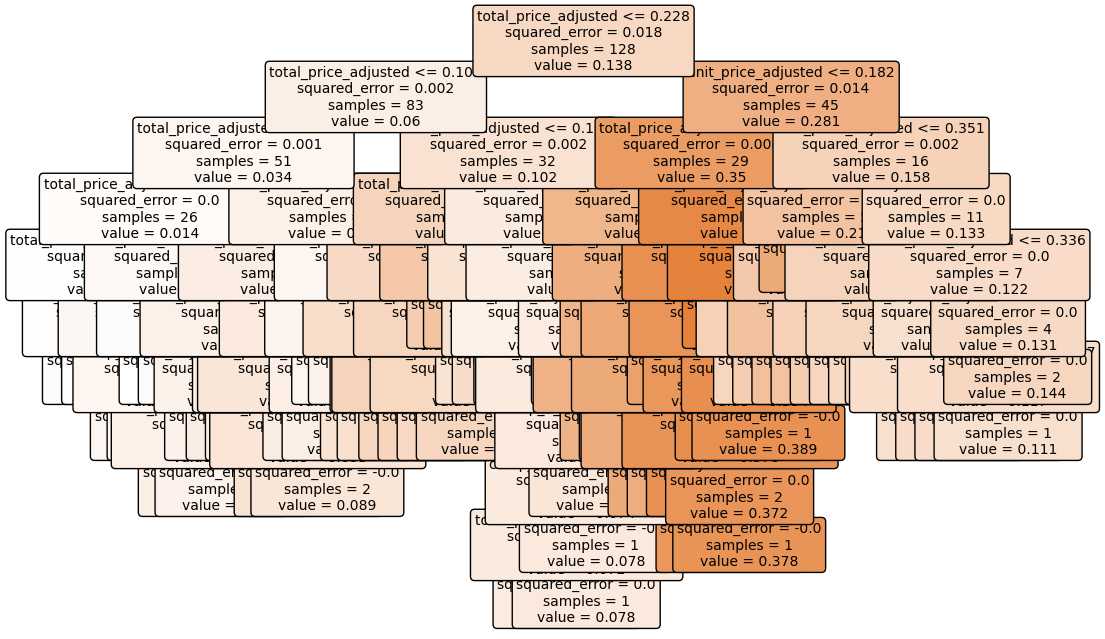


Decision Tree Rules:
|--- total_price_adjusted <= 0.23
|   |--- total_price_adjusted <= 0.10
|   |   |--- total_price_adjusted <= 0.04
|   |   |   |--- total_price_adjusted <= 0.02
|   |   |   |   |--- total_price_adjusted <= 0.01
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- total_price_adjusted >  0.01
|   |   |   |   |   |--- unit_price_adjusted <= 0.29
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |--- unit_price_adjusted >  0.29
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- total_price_adjusted >  0.02
|   |   |   |   |--- unit_price_adjusted <= 0.30
|   |   |   |   |   |--- total_price_adjusted <= 0.03
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- total_price_adjusted >  0.03
|   |   |   |   |   |   |--- comp_3_adjusted <= 0.13
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- comp_3_adjusted >  0.13
|   |   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |--- unit_price_adjusted 

In [80]:
# Visualize the decision tree 
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=features, rounded=True, fontsize=10)
plt.show()

# Interpretation using decision tree rules
tree_rules = export_text(model, feature_names=features)
print('\nDecision Tree Rules:')
print(tree_rules)


# Prediction Task: Sales Prediction

In [81]:
#Target Variable (Dependent Variable): total_price (Total Sales)

# Select features and target variable

features=['qty_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
target = 'total_price_adjusted'

# Handle missing values 
df = df.dropna(subset=features + [target])



In [82]:
# Create X (features) and y (target)
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
X_train

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.033333,0.072488,0.076870,0.269540,0.0
2017-11-01,0.222222,0.290604,0.029869,0.536454,0.0
2017-05-01,0.211111,0.345681,0.186904,0.368694,0.0
2018-07-01,0.044444,0.363091,0.000000,0.086358,1.0
2017-06-01,0.022222,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.444444,0.028995,0.030748,0.431264,1.0
2018-08-01,0.066667,0.000000,0.000000,0.124491,1.0
2017-04-01,0.000000,0.072488,0.076870,0.140911,0.0


In [84]:
X_test

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.088889,0.000000,0.000000,0.128294,1.0
2017-03-01,0.111111,0.363091,0.186904,0.221490,0.0
2018-08-01,0.022222,0.000000,0.000000,0.295792,1.0
2018-04-01,0.133333,0.028995,0.030748,0.134354,1.0
2017-08-01,0.222222,0.072488,0.076870,0.124491,0.0
2018-08-01,0.066667,0.000000,0.000000,0.210934,1.0
2018-03-01,0.266667,0.028995,0.030748,0.309166,1.0
2017-12-01,0.344444,0.040049,0.044969,0.278222,0.0
2018-02-01,0.444444,0.008155,0.003514,0.540832,1.0


In [85]:
# Initialize and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0.09051231, 0.3453748 , 0.02114496, 0.14801475, 0.21053858,
       0.06343489, 0.28634688, 0.34344676, 0.68204638, 0.01485232,
       0.10572482, 0.48518369, 0.00211873, 0.68204638, 0.02750117,
       0.16710454, 0.15441332, 0.04027713, 0.48438493, 0.04019238,
       0.05287512, 0.0528836 , 0.01082673, 0.3453748 , 0.28132548,
       0.52328912, 0.68204638, 0.33209034, 0.15441332, 0.06343489,
       0.01226747, 0.04027713])

In [86]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.002615664903798392
R-squared: 0.9308628148096595


In [87]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print('\nFeature Importances:')
print(feature_importances)


Feature Importances:
               Feature  Importance
0         qty_adjusted    0.860782
1  unit_price_adjusted    0.120847
2      comp_3_adjusted    0.001089
3           s_adjusted    0.017080
4                 year    0.000201


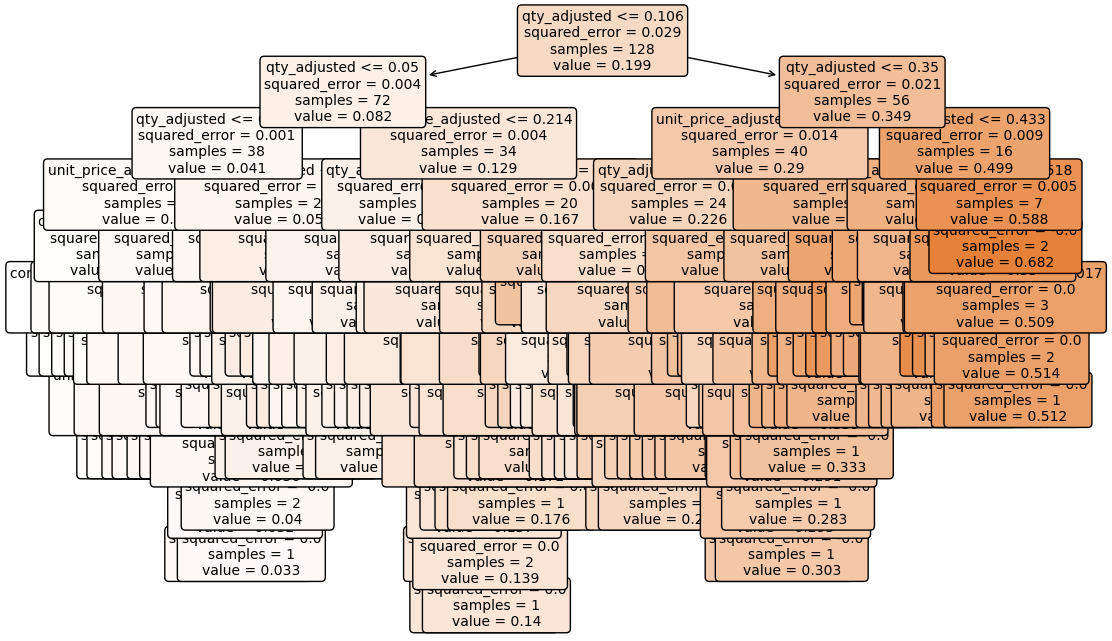

In [88]:
# Visualize the decision tree 
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=features, rounded=True, fontsize=10)
plt.show()


In [89]:
# Interpretation using decision tree rules
tree_rules = export_text(model, feature_names=features)
print('\nDecision Tree Rules:')
print(tree_rules)



Decision Tree Rules:
|--- qty_adjusted <= 0.11
|   |--- qty_adjusted <= 0.05
|   |   |--- qty_adjusted <= 0.02
|   |   |   |--- unit_price_adjusted <= 0.22
|   |   |   |   |--- qty_adjusted <= 0.01
|   |   |   |   |   |--- comp_3_adjusted <= 0.06
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- comp_3_adjusted >  0.06
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- qty_adjusted >  0.01
|   |   |   |   |   |--- comp_3_adjusted <= 0.05
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |--- comp_3_adjusted >  0.05
|   |   |   |   |   |   |--- value: [0.01]
|   |   |   |--- unit_price_adjusted >  0.22
|   |   |   |   |--- qty_adjusted <= 0.01
|   |   |   |   |   |--- unit_price_adjusted <= 0.69
|   |   |   |   |   |   |--- s_adjusted <= 0.14
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |--- s_adjusted >  0.14
|   |   |   |   |   |   |   |--- unit_price_adjusted <= 0.37
|   |   |   |   |   |   |   |   |--- value: [0.

# Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [91]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

features = ['qty_adjusted','unit_price_adjusted','comp_3_adjusted','s_adjusted','year']
target = 'total_price_adjusted'


In [92]:
# Handle missing values 
df = df.dropna(subset=features + [target])

# Create X (features) and y (target)
X = df[features]
y = df[target]


In [93]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2017-05-01,0.033333,0.072488,0.076870,0.269540,0.0
2017-11-01,0.222222,0.290604,0.029869,0.536454,0.0
2017-05-01,0.211111,0.345681,0.186904,0.368694,0.0
2018-07-01,0.044444,0.363091,0.000000,0.086358,1.0
2017-06-01,0.022222,0.072488,0.076870,0.029742,0.0
...,...,...,...,...,...
2018-04-01,0.444444,0.028995,0.030748,0.431264,1.0
2018-08-01,0.066667,0.000000,0.000000,0.124491,1.0
2017-04-01,0.000000,0.072488,0.076870,0.140911,0.0


In [95]:
X_test

,qty_adjusted,unit_price_adjusted,comp_3_adjusted,s_adjusted,year
month_year,,,,,
2018-07-01,0.088889,0.000000,0.000000,0.128294,1.0
2017-03-01,0.111111,0.363091,0.186904,0.221490,0.0
2018-08-01,0.022222,0.000000,0.000000,0.295792,1.0
2018-04-01,0.133333,0.028995,0.030748,0.134354,1.0
2017-08-01,0.222222,0.072488,0.076870,0.124491,0.0
2018-08-01,0.066667,0.000000,0.000000,0.210934,1.0
2018-03-01,0.266667,0.028995,0.030748,0.309166,1.0
2017-12-01,0.344444,0.040049,0.044969,0.278222,0.0
2018-02-01,0.444444,0.008155,0.003514,0.540832,1.0


In [96]:
# Initialize and train the random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [97]:
y_pred

array([0.08537756, 0.2495485 , 0.02496349, 0.16448782, 0.22469295,
       0.07131531, 0.28143608, 0.36079633, 0.61656123, 0.0133405 ,
       0.18389057, 0.43755899, 0.00481465, 0.65328036, 0.02493199,
       0.16724802, 0.24299528, 0.0383159 , 0.45567717, 0.03956672,
       0.05665863, 0.05419425, 0.01379974, 0.24449553, 0.24243777,
       0.45562939, 0.65799543, 0.31799984, 0.23002456, 0.07203475,
       0.01480857, 0.05892324])

In [98]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.001419187755213268
R-squared: 0.9624880669884134


In [99]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print('\nFeature Importances:')
print(feature_importances)



Feature Importances:
               Feature  Importance
0         qty_adjusted    0.820680
1  unit_price_adjusted    0.088823
2      comp_3_adjusted    0.005548
3           s_adjusted    0.083135
4                 year    0.001814


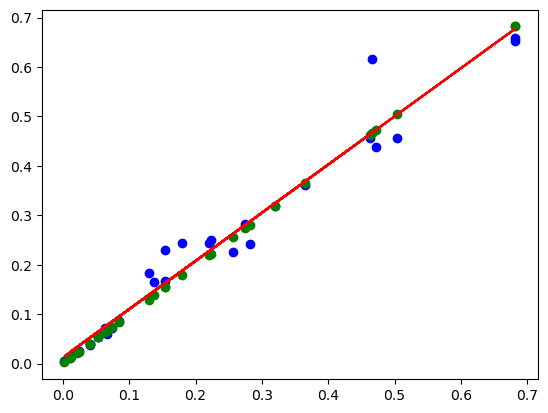

In [100]:
# Visualize the predicted vs actual values
# Assuming y_test and y_pred are the actual and predicted values respectively

# Fit a linear regression line to the scatter plot
m, b = np.polyfit(y_test, y_pred, 1)  # 1 indicates linear regression
plt.plot(y_test, m * y_test + b, color='red')

plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Predicted points in blue
plt.scatter(y_test, y_test, color='green', label='Actual')  # Actual points in green


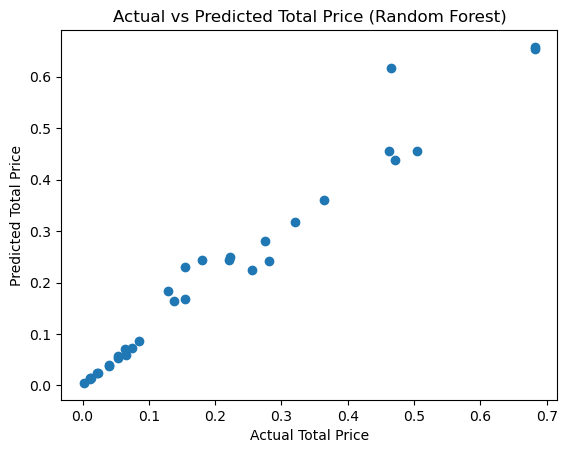

In [101]:
# Plot the scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Price")
plt.ylabel("Predicted Total Price")
plt.title("Actual vs Predicted Total Price (Random Forest)")

# Show the plot
plt.show()


# Market Share Analysis:

Calculate and analyze market share changes over time.
Evaluate the impact of competitor price on your market share.

In [102]:
# Calculate market share for each month
df['market_share'] = df['qty_adjusted'] / (df['qty_adjusted'] + df[['comp_3_adjusted']].sum(axis=1))

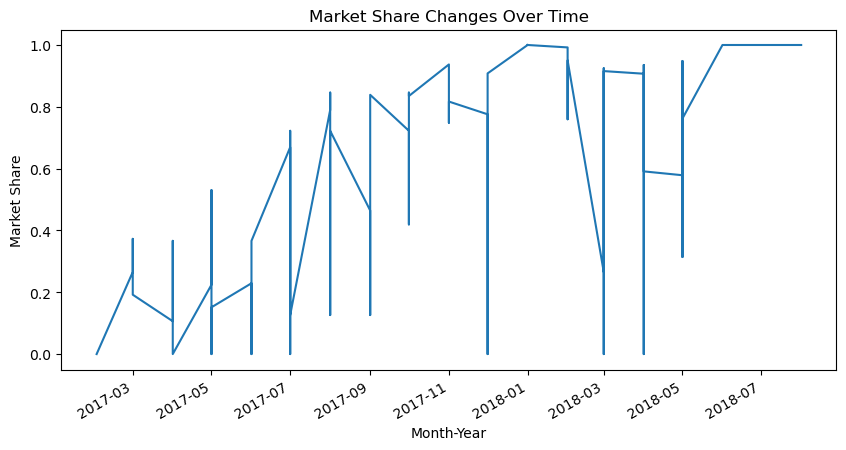

In [103]:
# Plot market share changes over time
plt.figure(figsize=(10, 5))
df['market_share'].plot(title='Market Share Changes Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Market Share')
plt.show()


# To compare the accuracies of different regression models (linear regression, decision tree, and random forest regressor) using a graph, you can plot the model's performance metrics such as Mean Squared Error (MSE) or R-squared value. 

In [104]:
#Target variable-total_price
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)



In [105]:
# Fit models
linear_reg.fit(X_train, y_train)

LinearRegression()

In [106]:
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [107]:
random_forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [108]:
# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_decision_tree_reg = decision_tree_reg.predict(X_test)
y_pred_random_forest_reg = random_forest_reg.predict(X_test)


In [109]:
# Calculate MSE and R-squared for each model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mse_decision_tree_reg = mean_squared_error(y_test, y_pred_decision_tree_reg)
mse_random_forest_reg = mean_squared_error(y_test, y_pred_random_forest_reg)


In [110]:
print(mse_linear_reg)
print(mse_decision_tree_reg)
print(mse_random_forest_reg)

0.0030310513014236095
0.002615664903798392
0.001419187755213268


In [111]:
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
r2_decision_tree_reg = r2_score(y_test, y_pred_decision_tree_reg)
r2_random_forest_reg = r2_score(y_test, y_pred_random_forest_reg)

In [112]:
print(r2_linear_reg)
print(r2_decision_tree_reg)
print(r2_random_forest_reg)

0.919883332592171
0.9308628148096595
0.9624880669884134


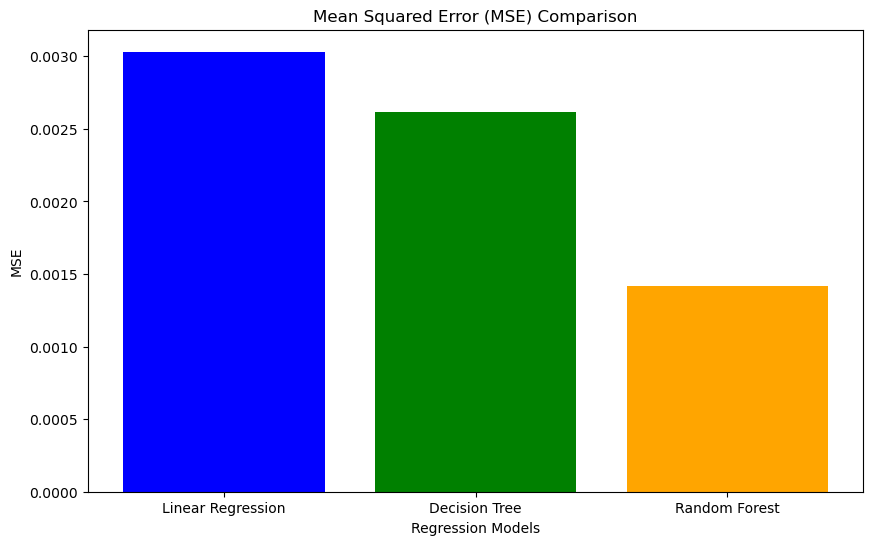

In [113]:
# Create a bar plot to compare MSE
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_linear_reg, mse_decision_tree_reg, mse_random_forest_reg]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.show()

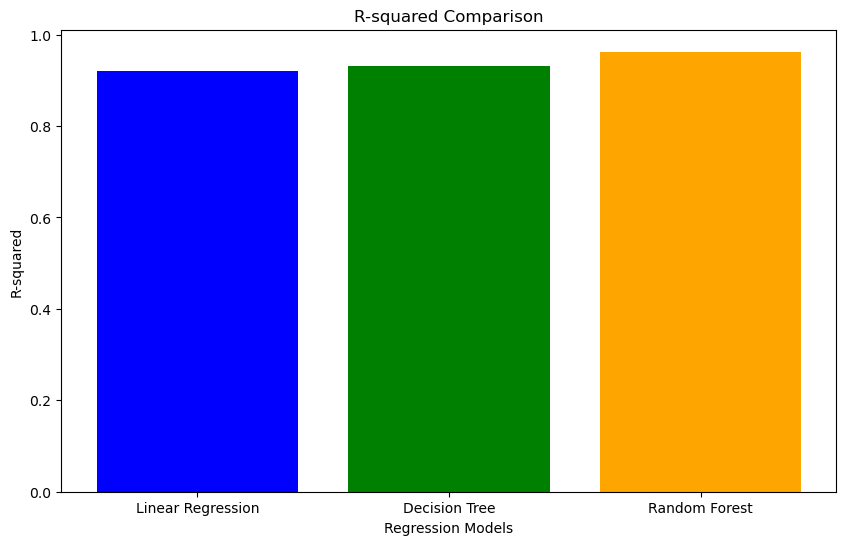

In [114]:
# Create a bar plot to compare R-squared
r2_values = [r2_linear_reg, r2_decision_tree_reg, r2_random_forest_reg]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('R-squared Comparison')
plt.xlabel('Regression Models')
plt.ylabel('R-squared')
plt.show()
